# 4.4 Piecewise polynomials: spline interpolation

As we observed in Section [](section4.2), a polynomial interpolant of high degree can have large oscillations, and thus provide an overall poor approximation to the underlying function. Recall that the degree of the interpolating polynomial is directly linked to the number of data points: we do not have the freedom to choose the degree of the polynomial.

In spline interpolation, we take a very different approach: instead of finding a single polynomial that fits the given data, we find one low-degree polynomial that fits every **pair** of data. This results in several polynomial pieces joined together, and we typically impose some smoothness conditions on different pieces. The term **spline function** means a function that consists of polynomial pieces
joined together with some smoothness conditions.

In **linear spline interpolation**, we simply join data points (the nodes), by line
segments, that is, linear polynomials. For example, consider the following figure that plots three data points $(x_{i-1},y_{i-1}),(x_i,y_i),(x_{i+1},y_{i+1})$. We fit a linear polynomial $P(x)$ to the first pair of data points $(x_{i-1},y_{i-1}),(x_i,y_i)$, and another linear polynomial $Q(x)$ to the second pair of data points $(x_i,y_i),(x_{i+1},y_{i+1})$.

![Linear spline](./images/linear_spline_fig.png)

Let $P(x)=ax+b$ and $Q(x)=cx+d$. We find the coefficients $a,b,c,d$ by solving
\begin{align*}
P(x_{i-1}) & =y_{i-1}\\
P(x_{i}) & =y_{i}\\
Q(x_{i}) & =y_{i}\\
Q(x_{i+1}) & =y_{i+1}
\end{align*}
which is a system of four equations and four unknowns. We then repeat this procedure for all data points, $(x_0,y_0),(x_1,y_1),...,(x_n,y_n)$, to determine all of the linear polynomials.

One disadvantage
of linear spline interpolation is the lack of smoothness. The first derivative of the
spline is not continuous at the nodes (unless the data fall on a line). We can obtain better smoothness by increasing the degree of the piecewise polynomials. In **quadratic spline interpolation**, we connect the nodes via second
degree polynomials.

![Quadratic spline](./images/quadratic_spline_fig.png)

Let $P(x)=a_{0}+a_{1}x+a_{2}x^{2}$ and $Q(x)=b_{0}+b_{1}x+b_{2}x^{2}.$
There are six unknowns to determine, but only four equations from the interpolation conditions:
 $P(x_{i-1})=y_{i-1},P(x_{i})=y_{i},Q(x_{i})=y_{i},Q(x_{i+1})=y_{i+1}$.
We can find extra two conditions by requiring some smoothness, $P'(x_{i})=Q'(x_{i})$,
and another equation by requiring $P'$ or $Q'$ take a certain value at one
of the end points.

## Cubic spline interpolation

This is the most common spline
interpolation. It uses cubic polynomials to connect the nodes. Consider the data
\begin{equation*}
(x_0,y_0),(x_1,y_1),...,(x_n,y_n),
\end{equation*}
where $x_0<x_1<...<x_n$. In the figure below, the cubic polynomials interpolating pairs of data are labeled as $S_{0},...,S_{n-1}$ (we ignore the $y$-coordinates in the plot).

![Cubic spline](./images/cubic_spline_fig.png)

The polynomial $S_i$ interpolates the nodes $(x_i,y_i),(x_{i+1},y_{i+1})$. Let
\begin{equation*}
S_{i}(x)=a_{i}+b_{i}x+c_{i}x^{2}+d_{i}x^{3}
\end{equation*}
for $i=0,1,...,n-1.$ There are $4n$ unknowns to determine: $a_i,b_i,c_i,d_i$, as $i$ takes on values from 0 to $n-1$. Let's describe the
equations $S_i$ must satisfy. First, the interpolation conditions, that is, the requirement that $S_i$ passes through the nodes $(x_i,y_i),(x_{i+1},y_{i+1})$:
\begin{align*}
S_{i}(x_{i}) & =y_{i}\\
S_{i}(x_{i+1}) & =y_{i+1}
\end{align*}
for $i=0,1,...,n-1$, which gives $2n$ equations. The next group
of equations are about smoothness:
\begin{align*}
S'_{i-1}(x_{i}) & =S_{i}'(x_{i})\\
S''_{i-1}(x_{i}) & =S''_{i}(x_{i})
\end{align*}
for $i=1,2,...,n-1$, which gives $2(n-1)=2n-2$ equations. Last two
equations are called the boundary conditions. There are two choices:

- Free or natural boundary: $S_{0}''(x_{0})=S_{n-1}''(x_{n})=0$
- Clamped boundary: $S_{0}'(x_{0})=f'(x_{0})$ and $S_{n-1}'(x_{n})=f'(x_{n})$

Each boundary choice gives another two equations, bringing the total number of equations to $4n$. There are $4n$ unknowns as well. Do these systems of equations have a unique solution? The answer is yes, and a proof can be found in Burden et al. [2016]. The spline obtained from the first boundary choice is called a **natural spline**, and the other one is called a **clamped spline**.

\begin{example}\label{example:chap3_exa64}
Find the natural cubic spline that interpolates the data $(0,0),(1,1),(2,0)$.
\end{example}

**Solution.**

We have two cubic polynomials to determine:
\begin{align*}
S_0(x)&=a_0+b_0x+c_0x^2+d_0x^3\\
S_1(x)&=a_1+b_1x+c_1x^2+d_1x^3
\end{align*}
The interpolation equations are:
\begin{align*}
S_0(0)=0 &\Rightarrow a_0=0\\
S_0(1)=1 &\Rightarrow a_0+b_0+c_0+d_0=1\\
S_1(1)=1 &\Rightarrow a_1+b_1+c_1+d_1=1\\
S_1(2)=0 &\Rightarrow a_1+2b_1+4c_1+8d_1=0
\end{align*}
We need the derivatives of the polynomials for the other equations:
\begin{align*}
S_0'(x)&=b_0+2c_0x+3d_0x^2\\
S_1'(x)&=b_1+2c_1x+3d_1x^2\\
S_0''(x)&=2c_0+6d_0x\\
S_1''(x)&=2c_1+6d_1x
\end{align*}
The smoothness conditions are:
\begin{align*}
S_0'(1)=S_1'(1) &\Rightarrow b_0+2c_0+3d_0=b_1+2c_1+3d_1\\
S_0''(1)=S_1''(1) &\Rightarrow 2c_0+6d_0=2c_1+6d_1
\end{align*}
The natural boundary conditions are:
\begin{align*}
S_0''(0)=0 &\Rightarrow 2c_0=0\\
S_1''(2)=0 &\Rightarrow 2c_1+12d_1=0
\end{align*}
There are eight equations and eight unknowns. However, $a_0=c_0=0$, so that reduces the number of equations and unknowns to six. We rewrite the equations below, substituting $a_0=c_0=0$, and simplifying when possible:
\begin{align*}
b_0+d_0&=1\\
a_1+b_1+c_1+d_1&=1\\
a_1+2b_1+4c_1+8d_1&=0\\
b_0+3d_0&=b_1+2c_1+3d_1\\
3d_0&=c_1+3d_1\\
c_1+6d_1&=0
\end{align*}
We will use Python to solve this system of equations. To do that, we first rewrite the system of equations as a matrix equation
\begin{equation*}
Ax=v
\end{equation*}
where
\begin{equation*}
A=\begin{bmatrix}
1 & 1& 0&0&0&0\\
0&0&1&1&1&1\\
0 & 0& 1&2&4&8\\
1&3&0&-1&-2&-3\\
0&3&0&0&-1&-3\\
0&0&0&0&1&6
\end{bmatrix},
x=\begin{bmatrix}
b_0\\
d_0\\
a_1\\
b_1\\
c_1\\
d_1
\end{bmatrix},
v=\begin{bmatrix}
1\\
1\\
0\\
0\\
0\\
0
\end{bmatrix}.
\end{equation*}

We enter the matrices $A,v$ in Python and solve the equation $Ax=v$ using the command $np.linalg.solve$.

In [3]:
import numpy as np

In [4]:
A = np.array([[1, 1, 0, 0, 0, 0], [0, 0, 1, 1, 1, 1],
              [0, 0, 1, 2, 4, 8], [1, 3, 0, -1, -2, -3],
              [0, 3, 0, 0, -1, -3], [0, 0, 0, 0, 1, 6]])
A

array([[ 1,  1,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  1],
       [ 0,  0,  1,  2,  4,  8],
       [ 1,  3,  0, -1, -2, -3],
       [ 0,  3,  0,  0, -1, -3],
       [ 0,  0,  0,  0,  1,  6]])

In [5]:
v = np.array([1, 1, 0, 0, 0, 0])
v

array([1, 1, 0, 0, 0, 0])

In [6]:
np.linalg.solve(A, v)

array([ 1.5, -0.5, -1. ,  4.5, -3. ,  0.5])

Therefore, the polynomials are:
\begin{align*}
S_0(x)&=1.5x-0.5x^3\\
S_1(x)&=-1+4.5x-3x^2+0.5x^3
\end{align*}

Solving the equations of a spline even for three data points can be tedious. Fortunately, there is a general approach to solving the equations for natural and clamped splines, for any number of data points. We will use this approach when we write Python codes for splines next.

**Exercise 4.4-1**

Find the natural cubic spline interpolant for the following
data:
\begin{equation*}
\begin{array}{cccc}
x & -1 & 0 & 1\\
\hline
y & 1 & 2 & 0\\
\end{array}
\end{equation*}

**Exercise 4.4-2**

The following is a clamped cubic spline for a function $f$ defined on $[1,3]$:
\begin{equation*}
s(x)=\begin{cases}
s_{0}(x)=(x-1)+(x-1)^{2}-(x-1)^{3}, & \text{if }1\leq x<2\\
s_{1}(x)=a+b(x-2)+c(x-2)^{2}+d(x-2)^{3} & \text{if }2\leq x<3.
\end{cases}
\end{equation*}
Find $a,b,c,$ and $d,$ if $f'(1)=1$ and $f'(3)=2$.

## Python code for spline interpolation

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 The function **CubicNatural** takes the $x$- and
$y$-coordinates of the data as input, and computes the natural cubic
spline interpolating the data, by solving the resulting matrix equation.
The code is based on Algorithm 3.4 of Burden et al. [2016]. The output is the coefficients of the $m-1$ cubic
polynomials, $a_i,b_i,c_i,d_i,i=0,...,m-2$ where $m$ is the number of
data points. These coefficients are stored in the arrays $a,b,c,d$ and returned at the end of the function, so that we can access these arrays later to
evaluate the spline for a given value $w$.

In [8]:
def CubicNatural(x, y):
    m = x.size # m is the number of data points
    n = m-1
    a = np.zeros(m)
    b = np.zeros(n)
    c = np.zeros(m)
    d = np.zeros(n)
    for i in range(m):
        a[i] = y[i]
    h = np.zeros(n)
    for i in range(n):
        h[i] = x[i+1] - x[i]
    u = np.zeros(n)
    u[0] = 0
    for i in range(1, n):
        u[i] = 3*(a[i+1]-a[i])/h[i]-3*(a[i]-a[i-1])/h[i-1]
    s = np.zeros(m)
    z = np.zeros(m)
    t = np.zeros(n)
    s[0] = 1
    z[0] = 0
    t[0] = 0
    for i in range(1, n):
        s[i] = 2*(x[i+1]-x[i-1])-h[i-1]*t[i-1]
        t[i] = h[i]/s[i]
        z[i]=(u[i]-h[i-1]*z[i-1])/s[i]
    s[m-1] = 1
    z[m-1] = 0
    c[m-1] = 0
    for i in np.flip(np.arange(n)):
        c[i] = z[i]-t[i]*c[i+1]
        b[i] = (a[i+1]-a[i])/h[i]-h[i]*(c[i+1]+2*c[i])/3
        d[i] = (c[i+1]-c[i])/(3*h[i])
    return a, b, c, d

Once the matrix equation is solved, and the coefficients of the cubic
polynomials are computed by **CubicNatural**, the next step is
to evaluate the spline at a given value. This is done by the following
function **CubicNaturalEval**. The inputs are the value at
which the spline is evaluated, $w$, the $x$-coordinates of the
data and the coefficients computed by **CubicNatural**. The function first finds the interval $[x_i,x_{i+1}],i=0,...,m-2,$
$w$ belongs to, and then evaluates the spline at $w$ using the
corresponding cubic polynomial.

In [9]:
def CubicNaturalEval(w, x, coeff):
    m = x.size
    if w<x[0] or w>x[m-1]:
        print('error: spline evaluated outside its domain')
        return
    n = m-1
    p = 0
    for i in range(n):
        if w <= x[i+1]:
            break
        else:
            p += 1
    # p is the number of the subinterval w falls into, i.e., p=i means
    # w falls into the ith subinterval $(x_i,x_{i+1}), and therefore
    # the value of the spline at w is
    # a_i+b_i*(w-x_i)+c_i*(w-x_i)^2+d_i*(w-x_i)^3.
    a = coeff[0]
    b = coeff[1]
    c = coeff[2]
    d = coeff[3]
    return a[p]+b[p]*(w-x[p])+c[p]*(w-x[p])**2+d[p]*(w-x[p])**3

 Next we will compare Newton and natural cubic spline interpolation when
applied to Runge's function. We import the functions for Newton
interpolation first.

In [10]:
def diff(x, y):
    m = x.size #here m is the number of data points.
    a = np.zeros(m)
    for i in range(m):
        a[i] = y[i]
    for j in range(1, m):
        for i in np.flip(np.arange(j,m)):
            a[i] = (a[i]-a[i-1]) / (x[i]-x[i-(j)])
    return a

In [11]:
def newton(x, y, z):
    m = x.size # here m is the number of data points, not the degree
    # of the polynomial
    a = diff(x, y)
    sum = a[0]
    pr = 1.0
    for j in range(m-1):
        pr *= (z-x[j])
        sum += a[j+1]*pr
    return sum

Here is the code that computes the cubic spline, Newton interpolation,
and plot them.

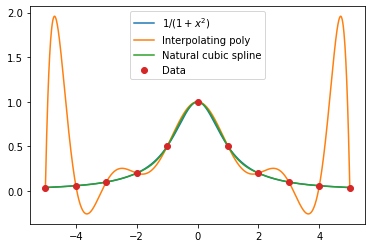

In [12]:
xaxis = np.linspace(-5, 5, 1000)
f = lambda x: 1/(1+x**2)
runge = f(xaxis)
xi = np.arange(-5, 6)
yi = f(xi)
coeff = CubicNatural(xi, yi)
naturalspline = np.array(list(map(lambda x: CubicNaturalEval(x, xi, coeff), xaxis)))
interp = newton(xi, yi, xaxis) # Interpolating polynomial for
# the data
plt.plot(xaxis, runge, label='$1/(1+x^2)$')
plt.plot(xaxis, interp, label='Interpolating poly')
plt.plot(xaxis, naturalspline, label='Natural cubic spline')
plt.plot(xi, yi, 'o', label='Data')
plt.legend(loc='upper center');

The cubic spline gives an excellent fit to Runge's function on this
scale: we cannot visually separate it from the function itself.

The following function **CubicClamped** computes the clamped
cubic spline; the code is based on Algorithm 3.5 of Burden et al. [2016]. The function
**CubicClampedEval** evaluates the spline at a given value.

In [13]:
def CubicClamped(x, y, yprime_left, yprime_right):
    m = x.size # m is the number of data points
    n = m-1
    A = np.zeros(m)
    B = np.zeros(n)
    C = np.zeros(m)
    D = np.zeros(n)
    for i in range(m):
        A[i] = y[i]
    h = np.zeros(n)
    for i in range(n):
        h[i] = x[i+1] - x[i]
    u = np.zeros(m)
    u[0] = 3*(A[1]-A[0])/h[0]-3*yprime_left
    u[m-1] = 3*yprime_right-3*(A[m-1]-A[m-2])/h[m-2]
    for i in range(1, n):
        u[i] = 3*(A[i+1]-A[i])/h[i]-3*(A[i]-A[i-1])/h[i-1]
    s = np.zeros(m)
    z = np.zeros(m)
    t = np.zeros(n)
    s[0] = 2*h[0]
    t[0] = 0.5
    z[0] = u[0]/s[0]
    for i in range(1, n):
        s[i] = 2*(x[i+1]-x[i-1])-h[i-1]*t[i-1]
        t[i] = h[i]/s[i]
        z[i] = (u[i]-h[i-1]*z[i-1])/s[i]
    s[m-1] = h[m-2]*(2-t[m-2])
    z[m-1] = (u[m-1]-h[m-2]*z[m-2])/s[m-1]
    C[m-1] = z[m-1]
    for i in np.flip(np.arange(n)):
        C[i] = z[i]-t[i]*C[i+1]
        B[i] = (A[i+1]-A[i])/h[i]-h[i]*(C[i+1]+2*C[i])/3
        D[i] = (C[i+1]-C[i])/(3*h[i])
    return A, B, C, D

In [14]:
def CubicClampedEval(w, x, coeff):
    m = x.size
    if w<x[0] or w>x[m-1]:
        print('error: spline evaluated outside its domain')
        return
    n = m-1
    p = 0
    for i in range(n):
        if w <= x[i+1]:
            break
        else:
            p += 1
    A = coeff[0]
    B = coeff[1]
    C = coeff[2]
    D = coeff[3]
    return A[p]+B[p]*(w-x[p])+C[p]*(w-x[p])**2+D[p]*(w-x[p])**3

In the following, we use natural and clamped cubic splines to
interpolate data coming from $\sin x$ at the x-coordinates:
$0,\pi,3 \pi/2, 2\pi$. The derivatives at the end points are both
equal to 1.

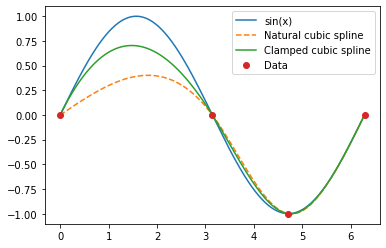

In [15]:
xaxis = np.linspace(0, 2*np.pi, 600)
f = lambda x: np.sin(x)
funct = f(xaxis)
xi = np.array([0, np.pi, 3*np.pi/2, 2*np.pi])
yi = f(xi)
coeff = CubicNatural(xi, yi)
naturalspline = np.array(list(map(lambda x: CubicNaturalEval(x, xi, coeff), xaxis)))
coeff = CubicClamped(xi, yi, 1, 1)
clampedspline = np.array(list(map(lambda x: CubicClampedEval(x, xi, coeff), xaxis)))

plt.plot(xaxis, funct, label='sin(x)')
plt.plot(xaxis, naturalspline, linestyle='--', label='Natural cubic spline')
plt.plot(xaxis, clampedspline, label='Clamped cubic spline')
plt.plot(xi, yi, 'o', label='Data')
plt.legend(loc='upper right');

Especially on the interval $(0,\pi)$, the clamped spline gives a much
better approximation to $\sin x$ than the natural spline. However,
adding an extra data point between 0 and $\pi$ removes the visual
differences between the splines.

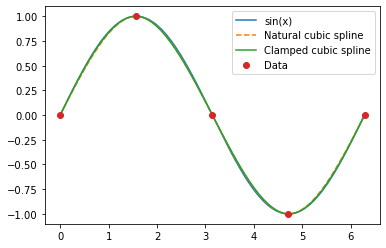

In [16]:
xaxis = np.linspace(0, 2*np.pi, 600)
f = lambda x: np.sin(x)
funct = f(xaxis)
xi = np.array([0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi])
yi = f(xi)
coeff = CubicNatural(xi, yi)
naturalspline = np.array(list(map(lambda x: CubicNaturalEval(x, xi, coeff), xaxis)))
coeff = CubicClamped(xi, yi, 1, 1)
clampedspline = np.array(list(map(lambda x: CubicClampedEval(x, xi, coeff), xaxis)))

plt.plot(xaxis, funct, label='sin(x)')
plt.plot(xaxis, naturalspline, linestyle='--', label='Natural cubic spline')
plt.plot(xaxis, clampedspline, label='Clamped cubic spline')
plt.plot(xi, yi, 'o', label='Data')
plt.legend(loc='upper right');

## Arya and the letter NUH

Arya loves Dr. Seuss (who doesn't?), and she is writing her term paper in an English class on *On Beyond Zebra!*[^1]. In this book Dr. Seuss invents new letters, one of which is called NUH. He writes:

<img src="./images/Seuss.png" width="200" height="100">

> And NUH is the letter I use to spell Nutches
>
> Who live in small caves, known as Nitches, for hutches.
>
> These Nutches have troubles, the biggest of which is
>
> The fact there are many more Nutches than Nitches.


What does this letter look like? Well, something like this.

<img src="./images/NUH_sketch.png" width="200" height="100">

What Arya wants is a digitized version of the sketch; a figure that is smooth and can be manipulated using graphics software. The letter NUH is a little complicated to apply a spline interpolation directly, since it has some cusps.   For such planar curves, we can use their parametric representation, and use a cubic spline interpolation for $x$- and $y$-coordinates separately. To this end, Arya picks eight points on the letter NUH, and labels them as $t=1,2,...,8$; see the figure below.

<img src="./images/NUHprime.png" width="200" height="100">

Then for each point she eyeballs the $x$ and $y$-coordinates with the help of a graph paper. The results are displayed in the table below.

\begin{equation*}
\begin{array}{c|cccccccc}
t & 1 & 2    & 3     & 4   & 5   & 6    & 7   & 8\\
\hline
x & 0 & 0    & -0.05 & 0.1 & 0.4 & 0.65 & 0.7   & 0.76\\
\hline
y & 0 & 1.25 & 2.5     & 1   & 0.3 & 0.9  & 1.5 & 0\\
\end{array}
\end{equation*}


The next step is to fit a cubic spline to the data $(t_1,x_1),...,(t_8,x_8)$, and another cubic spline to the data $(t_1,y_1),...,(t_8,y_8)$. Let's call these splines $\text{xspline}(t),\text{yspline}(t)$, respectively, since they represent the $x$- and $y$-coordinates as  functions of the parameter $t$. Plotting $\text{xspline}(t),\text{yspline}(t)$ will produce the letter NUH, as we can see in the following Python codes.

First, load the NumPy and Matplotlib packages, and copy and evaluate the functions **CubicNatural** and **CubicNaturalEval** that we discussed earlier. Here is the letter NUH, obtained by spline interpolation:

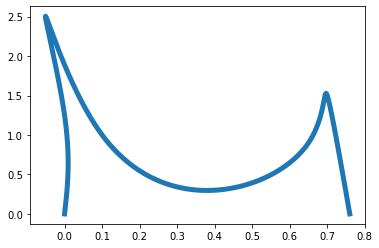

In [18]:
t = np.array([1,2,3,4,5,6,7,8])
x = np.array([0,0,-0.05,0.1,0.4,0.65,0.7,0.76])
y = np.array([0,1.25,2.5,1,0.3,0.9,1.5,0])
taxis = np.linspace(1, 8, 700)
coeff = CubicNatural(t, x)
xspline = np.array(list(map(lambda x: CubicNaturalEval(x, t, coeff), taxis)))
    
coeff = CubicNatural(t, y)
yspline = np.array(list(map(lambda x: CubicNaturalEval(x, t, coeff), taxis)))
    
plt.plot(xspline, yspline, linewidth=5);

This looks like it needs to be squeezed! Adjusting the aspect ratio
gives a better image. In the following, we use the commands

In [ ]:
w, h = plt.figaspect(2);
plt.figure(figsize=(w, h));

to adjust the aspect ratio.

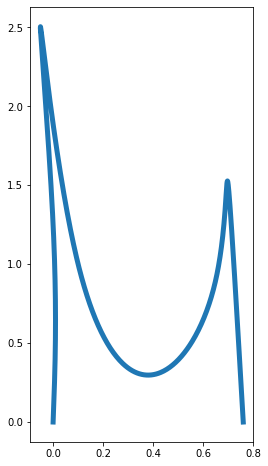

In [19]:
t = np.array([1,2,3,4,5,6,7,8])
x = np.array([0,0,-0.05,0.1,0.4,0.65,0.7,0.76])
y = np.array([0,1.25,2.5,1,0.3,0.9,1.5,0])
taxis = np.linspace(1, 8, 700)
coeff = CubicNatural(t, x)
xspline = np.array(list(map(lambda x: CubicNaturalEval(x, t, coeff), taxis)))
    
coeff = CubicNatural(t, y)
yspline = np.array(list(map(lambda x: CubicNaturalEval(x, t, coeff), taxis)))

w, h = plt.figaspect(2)
plt.figure(figsize=(w, h))
plt.plot(xspline, yspline, linewidth=5);

**Exercise 4.4-3**

Limacon is a curve, named after a French word for snail, which appears in the study of planetary motion. The polar equation for the curve is $r=1+c\sin\theta$ where $c$ is a constant. Below is a plot of the curve when $c=1$.

<img src="./images/limacon.png" width="400" height="200">

The $x,y$ coordinates of the dots on the curve are displayed in the following table:

\begin{equation*}
\begin{array}{c|ccccccccc}
x & 0 & 0.5 & 1 & 1.3 & 0 & -1.3 & -1 &  -0.5 & 0\\
\hline
y & 0 & -0.25 & 0 & 0.71 & 2 & 0.71 & 0 & -0.25 & 0\\
\end{array}
\end{equation*}

Recreate the limacon above, by applying the spline interpolation for plane curves approach used in *Arya and the letter NUH* example to the points given in the table.

[^1]: Seuss, 1955. On Beyond Zebra! Random House for Young Readers.

**References**

R.L. Burden, D. Faires, and A.M. Burden. Numerical Analysis. Cengate, 10th edition, 2016.